Primeras 10 filas del dataset:
       peso_kg  bateria_kwh  eficiencia_km_kwh
0  1949.014246    16.001971          43.833455
1  1758.520710    16.385793          46.592948
2  1994.306561    12.279901          42.827027
3  2256.908957    15.929015          43.685253
4  1729.753988    16.172290          47.729504
5  1729.758913    12.142594          43.867321
6  2273.763845    22.463098          51.213359
7  2030.230419    16.895332          44.419270
8  1659.157684    10.234786          43.404564
9  1962.768013    17.626214          46.585311


Estadísticas descriptivas:
           peso_kg  bateria_kwh  eficiencia_km_kwh
count   150.000000   150.000000         150.000000
mean   1775.301940    15.284919          46.538645
std     282.702667     4.086852           5.433838
min    1014.076469     2.034931          29.459171
25%    1599.308568    12.241246          43.396348
50%    1783.824576    15.568931          46.550731
75%    1947.280117    17.700924          50.295195
max    2538.972

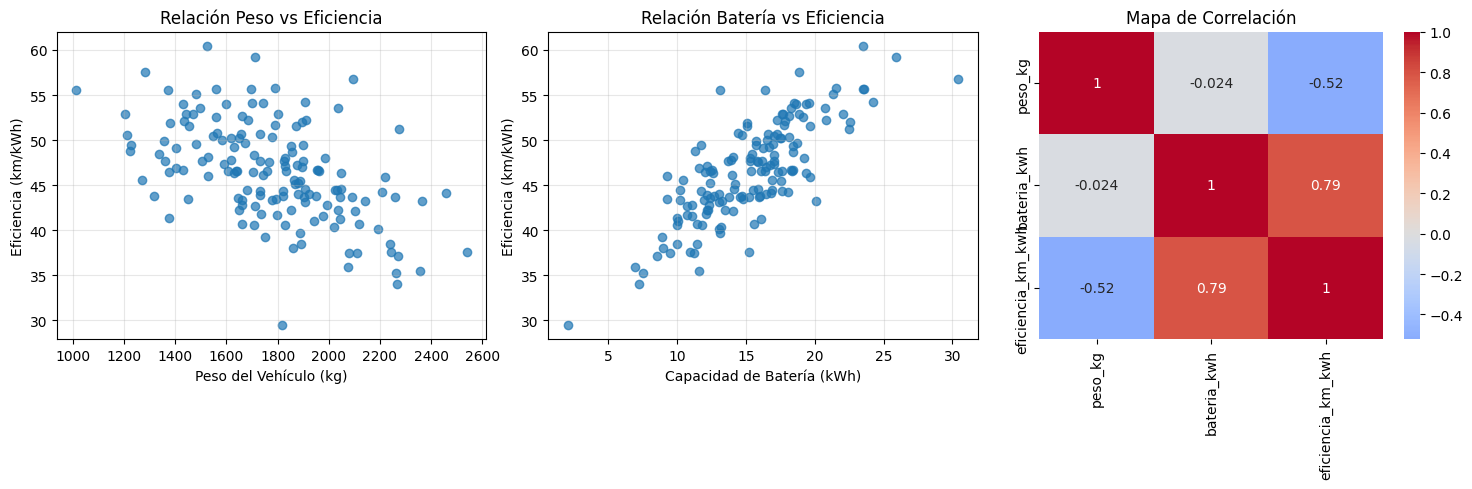


Tamaño del conjunto de entrenamiento: 120 muestras
Tamaño del conjunto de prueba: 30 muestras

RESULTADOS DEL MODELO DE REGRESIÓN LINEAL

Coeficientes del modelo:
Intercepto (β₀): 47.4326
Coeficiente para Peso (β₁): -0.009536
Coeficiente para Batería (β₂): 1.046530

Métricas de evaluación:
Error Cuadrático Medio (MSE): 3.4370
Coeficiente de Determinación R²: 0.8787


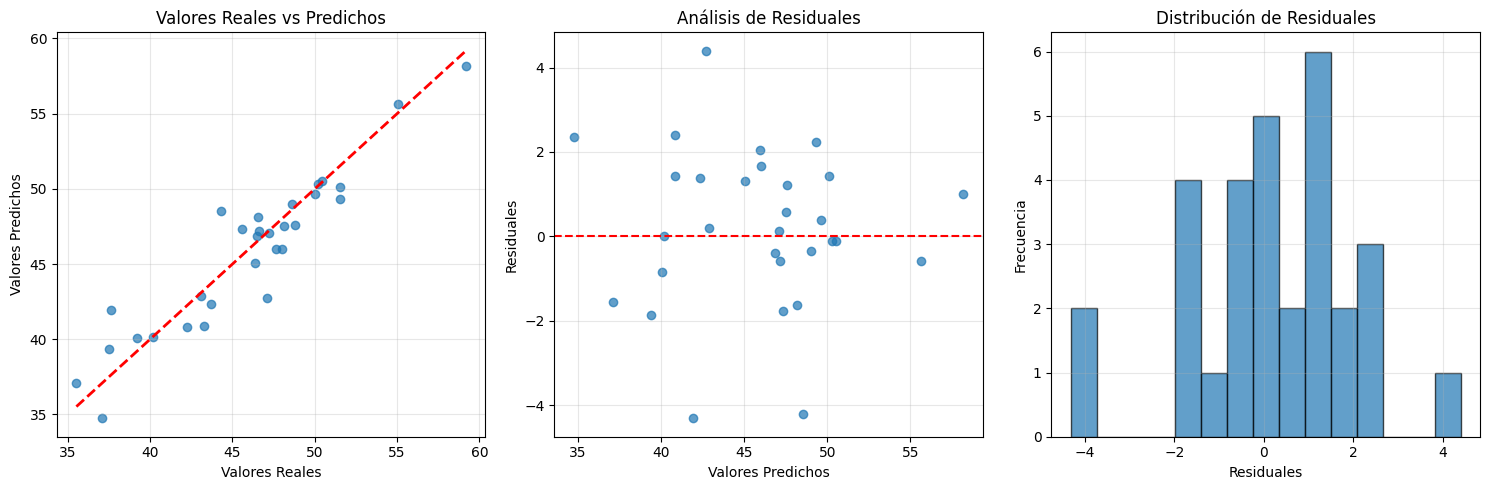


EJEMPLOS DE PREDICCIÓN

Predicciones para nuevos vehículos:
Vehículo 1: Peso 1600 kg, Batería 12 kWh → Eficiencia predicha: 44.73 km/kWh
Vehículo 2: Peso 2000 kg, Batería 18 kWh → Eficiencia predicha: 47.20 km/kWh
Vehículo 3: Peso 1850 kg, Batería 15 kWh → Eficiencia predicha: 45.49 km/kWh
Vehículo 4: Peso 1700 kg, Batería 14 kWh → Eficiencia predicha: 45.87 km/kWh
Vehículo 5: Peso 2100 kg, Batería 20 kWh → Eficiencia predicha: 48.34 km/kWh

INTERPRETACIÓN DEL MODELO
Ecuación de regresión:
Eficiencia = 47.4326 + (-0.009536 × Peso) + (1.046530 × Batería)

Interpretación:
- Por cada kg adicional de peso, la eficiencia disminuye en 0.009536 km/kWh
- Por cada kWh adicional de batería, la eficiencia aumenta en 1.046530 km/kWh
- El R² de 0.8787 indica que el modelo explica el 87.87% de la variabilidad en la eficiencia

VALIDACIÓN ADICIONAL
R² en conjunto de entrenamiento: 0.8753
R² en conjunto de prueba: 0.8787
El modelo generaliza bien (sin sobreajuste evidente)


In [1]:
# PASO 1: Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# PASO 2: Generación del dataset sintético (150 puntos)
np.random.seed(42)
n_samples = 150

# Variables: peso del vehículo (kg) y capacidad de batería (kWh)
peso_vehiculo = np.random.normal(1800, 300, n_samples)
capacidad_bateria = np.random.normal(15, 4, n_samples)

# Relación no lineal con ruido para hacerlo más realista
eficiencia = (45 - 0.008 * peso_vehiculo +
              1.2 * capacidad_bateria -
              0.0001 * peso_vehiculo * capacidad_bateria +
              np.random.normal(0, 2, n_samples))

# Crear DataFrame
data = pd.DataFrame({
    'peso_kg': peso_vehiculo,
    'bateria_kwh': capacidad_bateria,
    'eficiencia_km_kwh': eficiencia
})

# Mostrar primeras filas
print("Primeras 10 filas del dataset:")
print(data.head(10))
print("\n" + "="*50)

# PASO 3: Análisis exploratorio de datos
print("\nEstadísticas descriptivas:")
print(data.describe())

print("\nCorrelaciones:")
print(data.corr())

# Visualización de relaciones
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['peso_kg'], data['eficiencia_km_kwh'], alpha=0.7)
plt.title('Relación Peso vs Eficiencia')
plt.xlabel('Peso del Vehículo (kg)')
plt.ylabel('Eficiencia (km/kWh)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(data['bateria_kwh'], data['eficiencia_km_kwh'], alpha=0.7)
plt.title('Relación Batería vs Eficiencia')
plt.xlabel('Capacidad de Batería (kWh)')
plt.ylabel('Eficiencia (km/kWh)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Correlación')

plt.tight_layout()
plt.show()

# PASO 4: Preparación de datos para el modelo
X = data[['peso_kg', 'bateria_kwh']]
y = data['eficiencia_km_kwh']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# PASO 5: Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("\n" + "="*50)
print("RESULTADOS DEL MODELO DE REGRESIÓN LINEAL")
print("="*50)

# Coeficientes del modelo
print(f"\nCoeficientes del modelo:")
print(f"Intercepto (β₀): {modelo.intercept_:.4f}")
print(f"Coeficiente para Peso (β₁): {modelo.coef_[0]:.6f}")
print(f"Coeficiente para Batería (β₂): {modelo.coef_[1]:.6f}")

# PASO 6: Predicciones y evaluación
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMétricas de evaluación:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación R²: {r2:.4f}")

# PASO 7: Visualización de resultados
plt.figure(figsize=(15, 5))

# Gráfico 1: Valores reales vs predichos
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True, alpha=0.3)

# Gráfico 2: Residuales
residuales = y_test - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuales, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análisis de Residuales')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.grid(True, alpha=0.3)

# Gráfico 3: Distribución de residuales
plt.subplot(1, 3, 3)
plt.hist(residuales, bins=15, alpha=0.7, edgecolor='black')
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 8: Ejemplo de predicciones
print("\n" + "="*50)
print("EJEMPLOS DE PREDICCIÓN")
print("="*50)

# Crear algunos casos de prueba nuevos
casos_prueba = pd.DataFrame({
    'peso_kg': [1600, 2000, 1850, 1700, 2100],
    'bateria_kwh': [12, 18, 15, 14, 20]
})

predicciones = modelo.predict(casos_prueba)

print("\nPredicciones para nuevos vehículos:")
for i, (_, caso) in enumerate(casos_prueba.iterrows()):
    print(f"Vehículo {i+1}: Peso {caso['peso_kg']} kg, "
          f"Batería {caso['bateria_kwh']} kWh → "
          f"Eficiencia predicha: {predicciones[i]:.2f} km/kWh")

# PASO 9: Interpretación del modelo
print("\n" + "="*50)
print("INTERPRETACIÓN DEL MODELO")
print("="*50)
print("Ecuación de regresión:")
print(f"Eficiencia = {modelo.intercept_:.4f} + ({modelo.coef_[0]:.6f} × Peso) + ({modelo.coef_[1]:.6f} × Batería)")

print(f"\nInterpretación:")
print(f"- Por cada kg adicional de peso, la eficiencia disminuye en {abs(modelo.coef_[0]):.6f} km/kWh")
print(f"- Por cada kWh adicional de batería, la eficiencia aumenta en {modelo.coef_[1]:.6f} km/kWh")
print(f"- El R² de {r2:.4f} indica que el modelo explica el {r2*100:.2f}% de la variabilidad en la eficiencia")

# PASO 10: Validación adicional
print("\n" + "="*50)
print("VALIDACIÓN ADICIONAL")
print("="*50)

# Predicción en datos de entrenamiento para comparar
y_train_pred = modelo.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R² en conjunto de entrenamiento: {r2_train:.4f}")
print(f"R² en conjunto de prueba: {r2:.4f}")

if abs(r2_train - r2) < 0.1:
    print("El modelo generaliza bien (sin sobreajuste evidente)")
else:
    print("Posible sobreajuste o subajuste en el modelo")